[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nilsjennissen/r-handbook/blob/main/notebooks/r-notebook.ipynb)

# Running R in a Jupyter notebook
We can use R Language in a Jupyter notebook. This is a great way to combine R and Python in one notebook.

In [13]:
# Installing pacakges
install.packages("gapminder")
install.packages("gifski")


The downloaded binary packages are in
	/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T//RtmpcfgJx6/downloaded_packages

The downloaded binary packages are in
	/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T//RtmpcfgJx6/downloaded_packages


In [14]:
# Load libraries
library(reshape)
library(gapminder)
library(dplyr)
library(ggplot2)
library(gganimate)
library(gifski)

## Load data

In [15]:
# Loading the gapminder dataset from the gapminder package
data(gapminder)


In [16]:
head(gapminder)


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


## Initial data analysis for the Gapminder dataset
Let's try some functions to get a better understanding of the data.

In [6]:
# What is the shape of the dataset?


In [7]:
# What are the column names?


In [8]:
# What are the data types?


In [17]:
# What are the first 6 rows?


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [11]:
# What are the last 6 rows?


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


In [12]:
# Return unique values for column year


[1] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007

In [13]:
# How are the variables lifeExp, pop and gdpPercap related?


,lifeExp,pop,gdpPercap
lifeExp,1.00000000,0.06495537,0.58370622
pop,0.06495537,1.00000000,-0.02559958
gdpPercap,0.58370622,-0.02559958,1.00000000


In [14]:
# What are the summary statistics for the variable lifeExp?
summary(gapminder$lifeExp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.60   48.20   60.71   59.47   70.85   82.60 

## How can we get another angle at the data

In [2]:
# Visualization of the variable lifeExp over time
ggplot(gapminder, aes(x = year, y = lifeExp)) + geom_line()

ERROR: Error in gapminder %>% ggplot(aes(x = year, y = lifeExp, color = continent)): could not find function "%>%"


In [18]:
# Visualize the animation by writing to a data folder
# Animation gapminder
plot <- ggplot(
  gapminder,
  aes(x = gdpPercap, y = lifeExp, size = pop, color = continent, frame = year)
) +
  geom_point(show.legend = FALSE, alpha = 0.7) +
  scale_color_viridis_d() +
    scale_size_area(max_size = 12) +
    scale_x_log10() +
    labs(title = 'Year: {frame_time}', x = 'GDP per capita', y = 'Life expectancy') +
    theme(legend.position = 'bottom')


plot + transition_time(year) +
  labs(title = "Year: {frame_time}")

ERROR: Error: The animation object does not specify a save_animation method


In [24]:
# Function to make gapminder plot
make_plot <- function(year) {
  ggplot(
    gapminder[gapminder$year == year, ],
    aes(x = gdpPercap, y = lifeExp, size = pop, color = continent)
  ) +
    geom_point(show.legend = FALSE, alpha = 0.7) +
    scale_color_viridis_d() +
    scale_size_area(max_size = 12) +
    scale_x_log10() +
    labs(title = year, x = 'GDP per capita', y = 'Life expectancy') +
    theme(legend.position = 'bottom')
}

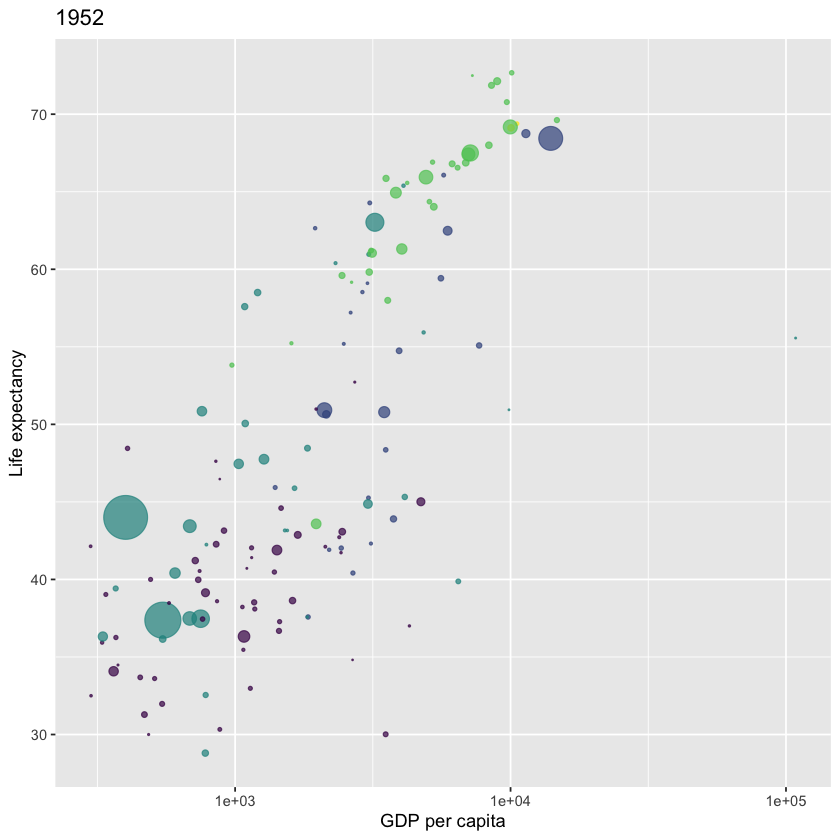

In [42]:
make_plot(1952)

In [41]:
# Example borrowed from gganimate
library(gapminder)
library(ggplot2)
makeplot <- function(){
  datalist <- split(gapminder, gapminder$year)
  lapply(datalist, function(data){
    p <- ggplot(data, aes(gdpPercap, lifeExp, size = pop, color = continent)) +
      scale_size("population", limits = range(gapminder$pop)) + geom_point() + ylim(20, 90) +
      scale_x_log10(limits = range(gapminder$gdpPercap)) + ggtitle(data$year) + theme_classic()
    print(p)
  })
}

# High Definition images:
gif_file <- save_gif(makeplot(), width = 800, height = 450, res = 92, gif_file = "../outputs/gapminder.gif")
utils::browseURL(gif_file)

In [40]:
help(save_gif)